# Hypothesis testing 

In this programming exercise you will explore numerical ways to calculate the power of a test and some properties of the power function. 

# Q1 (30% of exercise 5)

We saw in class that for composite hypotheses we need to consider the power function $\pi(\theta)$ instead of the power of the test $\pi$ which is a single value. 

In this question, you will evaluate the power of the following test: 

Assume that $X_1,...,X_n\sim N(\mu, \sigma^2)$ where both parameters are unknown and consider the hypotheses $H_0:\mu = 0$ vs. $H_1:\mu >0$. 

In this case, we reject the null if $\frac{\bar{X}_n}{S_n/\sqrt{n}}>t_{n-1, 1-\alpha}$ where $S_n^2=\frac{1}{n-1}\sum_{i=1}^{n}(X_i-\bar{X}_n)^2$ and $t_{n-1, 1-\alpha}$ is the $1-\alpha$ quantile of t distribution with $n-1$ degrees of freedom. 

A. Set $n=12$ and $\sigma^2=1$ (in reality this value is unknown)

B. Set $\mu_1=1$

C. Set $\alpha=0.05$

D. Draw a random sample $X_1,...,X_{12}\sim N(\mu_1,\sigma^2)$

E. Compute the test statistic and compare it to the critical value. Is the null rejected at significance level $\alpha$?

F. Repeat D-E 10,000 times. What is the proportion of rejections? 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats import t

def rejections(n, sigma2, mu1, alpha, B):
  X = np.random.normal(loc = mu1, scale = sqrt(sigma2), size =n*B).reshape((B,n)) #sample 
  S_n = np.std(X, ddof = 1, axis = 1)   
  t_obs = sqrt(n)*np.mean(X,axis=1)/S_n
  t_val = t.ppf(1-alpha, n-1)
  do_reject = np.mean(t_obs>t_val)
  return do_reject

In [ ]:
print(rejections(n=12, sigma2=1, mu1=1, alpha=0.05, B=10000)) #print the result for the first setup

0.9461


Repeat A-F for different (positive) values of $\mu_1$ and plot the power function (it is convenient to write a function that executes A-F for different values of $\mu_1$). 
Explain your results. 

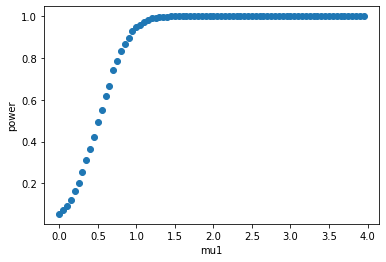

In [ ]:
mu1_range = np.array([np.arange(0,4,0.05)])
rejection_vec = np.vectorize(rejections)
power_func = rejection_vec(n=12, sigma2=1, mu1=mu1_range, alpha=0.05, B=10000)
plt.scatter(mu1_range, power_func)
plt.xlabel('mu1')
plt.ylabel('power')
plt.show()

We see that the power function is increasing in $\mu_1$. 

Recall that the power of a test is the probability to correctly reject the null. If $\mu_1$ is large, it is more probable to reject correctly the null, as the mean of our sample will be farther than 0 (if the alternative is correct).

Plot on the same graph the power function for different values of $\sigma^2$. Explain your results. 

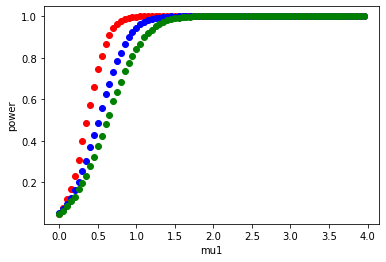

In [ ]:
mu1_range = np.array([np.arange(0,4,0.05)])
sigmas = np.array([0.5,1,1.5])
cols = ['r','b','g']
for s,cl in zip(sigmas, cols):
  power_func = rejection_vec(n=12, sigma2=s, mu1=mu1_range, alpha=0.05, B=10000)
  plt.scatter(x=mu1_range, y=power_func, c=cl)

plt.xlabel('mu1')
plt.ylabel('power')
plt.show()

The power is lower when we increase the variance. We can see the variance as noise. The more noise we have, the harder it is to determine with certainty that we should reject the null. 

Now fix again $\sigma^2=1$ and plot on the same graph the power function for different values of $\alpha$. Explain your results.

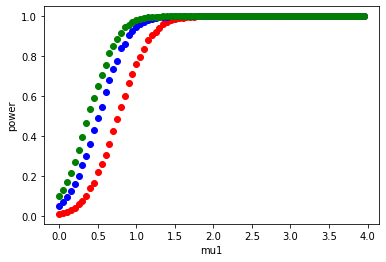

In [ ]:
mu1_range = np.array([np.arange(0,4,0.05)])
alphas = np.array([0.01,0.05,0.1])
cols = ['r','b','g']
for a,cl in zip(alphas, cols):
  power_func = rejection_vec(n=12, sigma2=1, mu1=mu1_range, alpha=a, B=10000)
  plt.scatter(x=mu1_range, y=power_func, c=cl)

plt.xlabel('mu1')
plt.ylabel('power')
plt.show()

Here, the power increases as the significance level $\alpha$ increases, that is, as $1-\alpha$ decreases. 

This is because of the trade-off that we saw between the two types of errors (type1 up => type2 down => power up).
